1 : Files generation

In [6]:
import yfinance as yf
import pandas as pd

# Define the universe (20 assets)
anchor = ["HG=F"]
proxies = ["CPER", "JJCTF", "PICK", "XME"]
equities = [
    "FCX", "SCCO", "IVPAF", "LUNMF", "TECK", 
    "HBM", "ERO", "AAUKF", "BHP", "RIO",
    "GLNCY", "ANFGF", "FM.TO", "ZIJMF", "TGB"
]

full_universe = anchor + proxies + equities

# Data parameters
start_date = "2020-01-01"
end_date = "2026-01-01"
output_file = "copper_project_data.csv"

# Download market data
print(f"Downloading data for {len(full_universe)} tickers...")
raw_data = yf.download(
    full_universe, 
    start=start_date, 
    end=end_date, 
    auto_adjust=True
)

# Extract Adjusted Close prices
prices = raw_data['Close']

# Handle missing values (forward fill for asynchronous market holidays)
# then drop remaining rows that are entirely empty (weekends)
prices = prices.ffill().dropna(how='all')

# Export to CSV
prices.to_csv(output_file)

print("-" * 40)
print(f"Export Complete: {output_file}")
print(f"Dimensions: {prices.shape[0]} rows x {prices.shape[1]} columns")
print("-" * 40)

[*********************100%***********************]  19 of 20 completed

20 Failed downloads:
['SCCO', 'TGB', 'AAUKF', 'IVPAF', 'PICK', 'ERO', 'HBM', 'RIO', 'HG=F', 'FCX', 'XME', 'JJCTF', 'GLNCY', 'ZIJMF', 'FM.TO', 'BHP', 'ANFGF', 'LUNMF', 'CPER', 'TECK']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


----------------------------------------
Export Complete: copper_project_data.csv
Dimensions: 0 rows x 20 columns
----------------------------------------


2 : General analysis

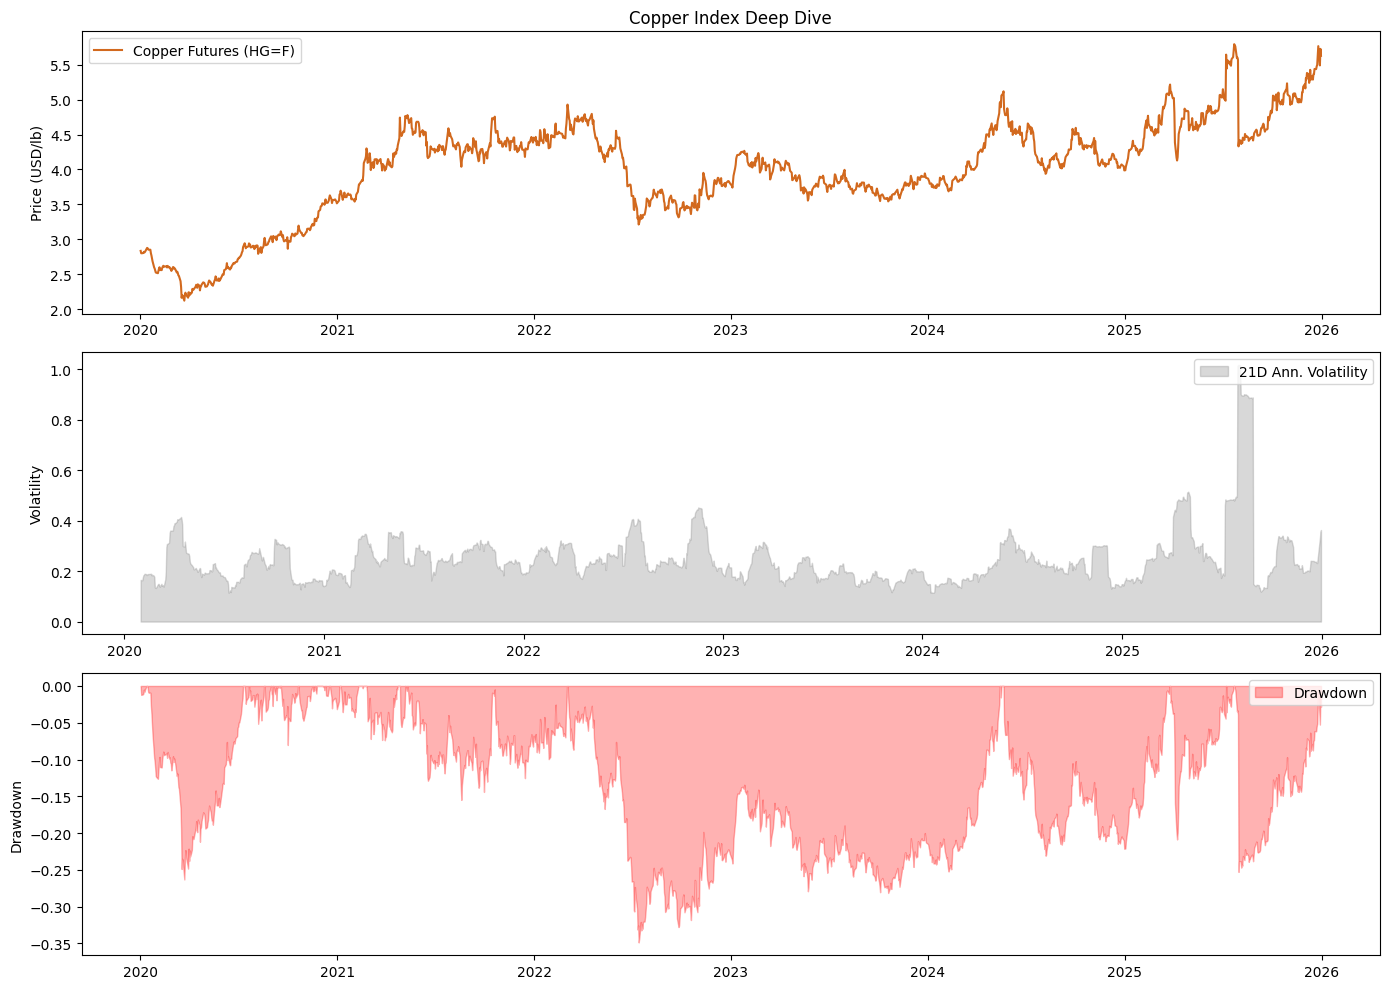

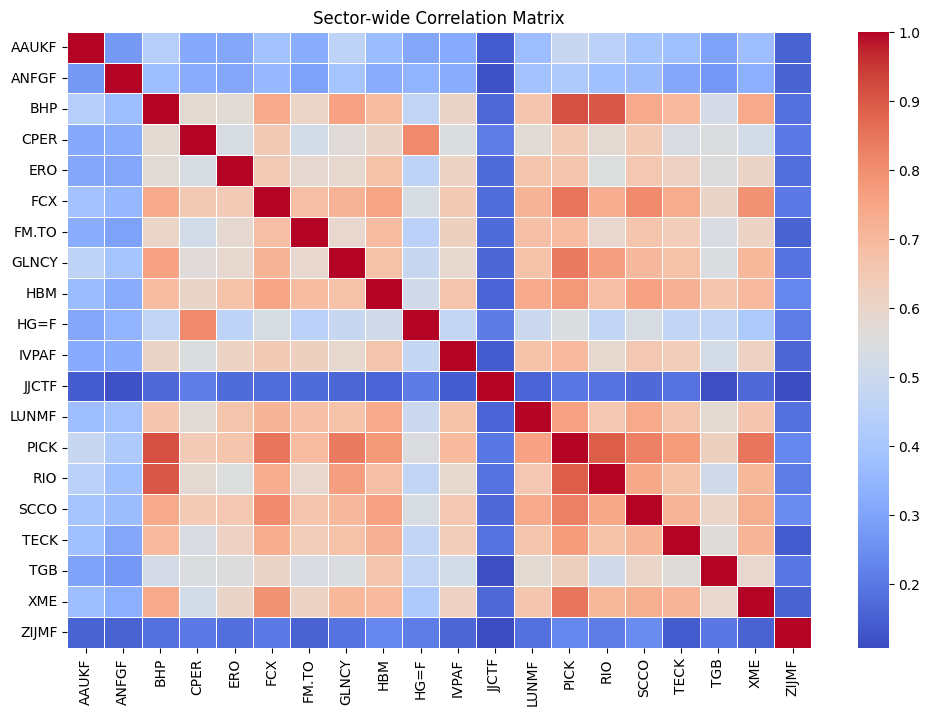

--- Statistical Summary: Copper Index ---
Annualized Return: 11.26%
Annualized Volatility: 27.00%
Worst Drawdown: -34.87%

--- Highest Correlated Equities to Copper ---
HG=F     1.000000
CPER     0.811742
PICK     0.543632
SCCO     0.536264
FCX      0.534437
HBM      0.515034
LUNMF    0.495290
GLNCY    0.487478
IVPAF    0.480113
TGB      0.471873
TECK     0.470713
RIO      0.470309
BHP      0.469076
ERO      0.460381
FM.TO    0.451385
XME      0.415393
ANFGF    0.342876
AAUKF    0.308974
ZIJMF    0.211170
JJCTF    0.207735
Name: HG=F, dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Clean Data
df = pd.read_csv("copper_project_data.csv", index_col='Date', parse_dates=True)

# Remove tickers with more than 20% missing data before filling
threshold = len(df) * 0.8
df = df.dropna(thresh=threshold, axis=1)

# Forward fill prices (to handle different market holidays)
prices = df.ffill().dropna()
# Calculate Log Returns
returns = np.log(prices / prices.shift(1)).dropna()

# 2. Profound Analysis of Copper Index (HG=F)
copper_prices = prices['HG=F']
copper_returns = returns['HG=F']

# Calculate rolling volatility (21-day annualized)
volatility = copper_returns.rolling(window=21).std() * np.sqrt(252)

# Compute Drawdown
rolling_max = copper_prices.cummax()
drawdown = (copper_prices - rolling_max) / rolling_max

# 3. Correlation Analysis
# Correlation of all assets vs the Anchor (HG=F)
correlation_matrix = returns.corr()
copper_corr = correlation_matrix['HG=F'].sort_values(ascending=False)

# 4. Visualization
plt.figure(figsize=(14, 10))

# Subplot 1: Copper Price and Volatility
plt.subplot(3, 1, 1)
plt.plot(copper_prices, label='Copper Futures (HG=F)', color='chocolate')
plt.title('Copper Index Deep Dive')
plt.ylabel('Price (USD/lb)')
plt.legend()

# Subplot 2: 21-Day Annualized Volatility
plt.subplot(3, 1, 2)
plt.fill_between(volatility.index, volatility, color='gray', alpha=0.3, label='21D Ann. Volatility')
plt.ylabel('Volatility')
plt.legend()

# Subplot 3: Drawdown
plt.subplot(3, 1, 3)
plt.fill_between(drawdown.index, drawdown, color='red', alpha=0.3, label='Drawdown')
plt.ylabel('Drawdown')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Sector-wide Correlation Matrix')
plt.show()

# Print Key Metrics
print("--- Statistical Summary: Copper Index ---")
print(f"Annualized Return: {copper_returns.mean() * 252:.2%}")
print(f"Annualized Volatility: {copper_returns.std() * np.sqrt(252):.2%}")
print(f"Worst Drawdown: {drawdown.min():.2%}")
print("\n--- Highest Correlated Equities to Copper ---")
print(copper_corr.head(20))

3 : Trading game 1

4 : Trading game 2 